In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# （復習）Pandasの基本的な操作一覧

| やりたいこと | コード | 返される形式 |
| --- | --- | --- |
| 上5列を表示 | df.head(5) | pandas.DataFrame |
| 下5列を表示 | df.tail(5) | pandas.DataFrame |
| １列だけ取得 | df[“列名1”] | pandas.Series |
| 複数列を選択 | df[[“列名1”, “列名2”, “列名3”]] | pandas.DataFrame |
| １行だけ取得 | df.loc[“行名1”] | pandas.Series |
| 複数行を選択 | df.loc[[“行名1”, “行名2”, “行名3”]] | pandas.DataFrame |
| 1列の値だけを取得 | df[“列名1”].values | numpy.array |
| (行名は無し) | df[“列名1”].tolist() | list |
| 列名の一覧 | df.columns |  |
| 行名の一覧 | df.index | |


# 検量線
スライドで説明します。

## データ
| ファイル名 | 説明 |
| --- | --- |
| mk_conc_standard.csv | 標準物質で測定した、濃度vs吸光度の値 |
| mk_conc_sample.csv | 未知濃度のサンプルの吸光度 |

※いずれも、吸光度はn=2で測定。平均値を使用することとする。

In [3]:
mk_standard = pd.read_csv("../data/csv/mk_conc_standard.csv", index_col=0)
mk_standard

,absorbance-1,absorbance-2,MK(ng/mL)
standard_sample,,,
1,0.005,0.003,0.0000
2,0.036,0.040,0.3125
3,0.074,0.065,0.6250
4,0.143,0.134,1.2500
5,0.292,0.275,2.5000
6,0.562,0.536,5.0000


In [4]:
mk_standard["absorbance-mean"] = mk_standard[["absorbance-1", "absorbance-2"]].mean(axis=1)
mk_standard

,absorbance-1,absorbance-2,MK(ng/mL),absorbance-mean
standard_sample,,,,
1,0.005,0.003,0.0000,0.0040
2,0.036,0.040,0.3125,0.0380
3,0.074,0.065,0.6250,0.0695
4,0.143,0.134,1.2500,0.1385
5,0.292,0.275,2.5000,0.2835
6,0.562,0.536,5.0000,0.5490


In [5]:
mk_sample = pd.read_csv("../data/csv/mk_conc_sample.csv", index_col=0)
mk_sample.head()

,absorbance-1,absorbance-2
sample,,
1,0.065,0.063
2,1.947,1.901
3,0.116,0.121
4,1.325,1.327
5,0.094,0.084


### 準備1. 入力値xを準備
x: 吸光度(平均値)

※ linear_regressionは重回帰にも対応しているため、入力値は2次元配列である必要がある。<br>
pandas.DataFrame形式で選択して、.valuesでデータのみを取り出す。

In [6]:
x = mk_standard[["absorbance-mean"]].values
x

array([[0.004 ],
       [0.038 ],
       [0.0695],
       [0.1385],
       [0.2835],
       [0.549 ]])

### 準備2. 入力値yを準備
y: 濃度

※ yは1次元配列でOK。pandas.Series形式で取得して、.valuesでデータのみを取る。

In [7]:
y = mk_standard["MK(ng/mL)"].values
y

array([0.    , 0.3125, 0.625 , 1.25  , 2.5   , 5.    ])

In [9]:
# scikit-learnライブラリから線形回帰モデルをインポート
from sklearn import linear_model

# 線形回帰モデルを作成
clf = linear_model.LinearRegression()

# 式に標準物質のデータを当てはめる。-> 結果をresに代入.
res = clf.fit(x, y)

In [10]:
# 回帰係数
a = res.coef_
# 切片
b = res.intercept_

print("回帰係数: ", a)
print("切片: ", b)

回帰係数:  [9.1269136]
切片:  -0.03206399595570608


`y = ax + b`に代入すると、<br>
`y = 9.1269136x - 0.03206399595570608`

<br><br>
散布図 + 直線グラフで可視化してみる。<br>

直線グラフの場合、`plt.plot(x, y)`で描画できますが、<br>
`x`と`y`はそれぞれ、配列をいれておく必要があります。<br><br>

任意の数列`plot_x`を作って、上の式の`x`に代入し、`plot_y`の値を算出しておきます。

In [11]:
plot_x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
plot_y = a * plot_x + b

print(plot_x)
print(plot_y)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
[-0.032064    0.88062736  1.79331872  2.70601009  3.61870145  4.53139281
  5.44408417]


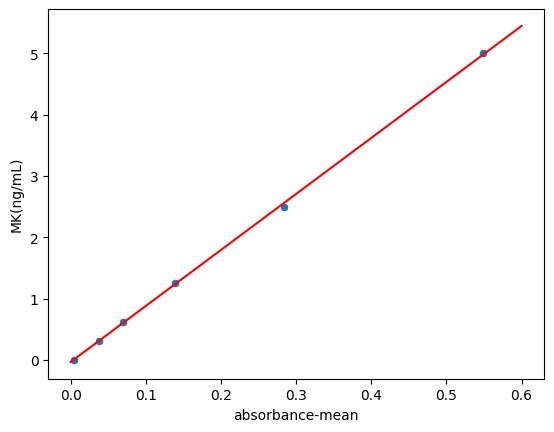

In [14]:
sns.scatterplot(data=mk_standard, x="absorbance-mean", y="MK(ng/mL)")
plt.plot(plot_x, plot_y, color="red")

plt.show()

### 検量線ができました。
では、濃度が未観測なサンプル、`mk_sample`の濃度を、それぞれの`absorbance`から求めてみましょう
。

In [22]:
x_sample = mk_sample[["absorbance-1", "absorbance-2"]].mean(axis=1).values
x_sample

array([0.064 , 1.924 , 0.1185, 1.326 , 0.089 , 2.381 , 0.081 , 2.413 ,
       0.0815, 2.4285, 0.0745, 1.797 , 0.076 , 2.1675, 0.0805, 2.3065,
       0.43  , 2.2415, 0.121 , 1.29  , 0.1105, 2.133 , 0.052 , 2.0175,
       0.0565, 2.0295, 0.0765, 2.194 , 0.0825, 2.288 , 0.054 , 2.302 ,
       0.053 , 2.0865, 0.0435, 2.057 , 0.0545, 2.343 , 0.055 , 0.915 ,
       0.436 , 0.003 ])

In [24]:
y_sample_predict = clf.predict(x_sample.reshape(-1, 1))
y_sample_predict

array([ 5.52058475e-01,  1.75281178e+01,  1.04947527e+00,  1.20702234e+01,
        7.80231315e-01,  2.16991173e+01,  7.07216006e-01,  2.19911785e+01,
        7.11779463e-01,  2.21326457e+01,  6.47891068e-01,  1.63689997e+01,
        6.61581438e-01,  1.97505212e+01,  7.02652549e-01,  2.10191622e+01,
        3.89250885e+00,  2.04259128e+01,  1.07229255e+00,  1.17416546e+01,
        9.76459957e-01,  1.94356427e+01,  4.42535511e-01,  1.83814842e+01,
        4.83606623e-01,  1.84910072e+01,  6.66144895e-01,  1.99923845e+01,
        7.20906376e-01,  2.08503143e+01,  4.60789339e-01,  2.09780911e+01,
        4.51662425e-01,  1.90112412e+01,  3.64956746e-01,  1.87419973e+01,
        4.65352795e-01,  2.13522946e+01,  4.69916252e-01,  8.31906195e+00,
        3.94727034e+00, -4.68325515e-03])

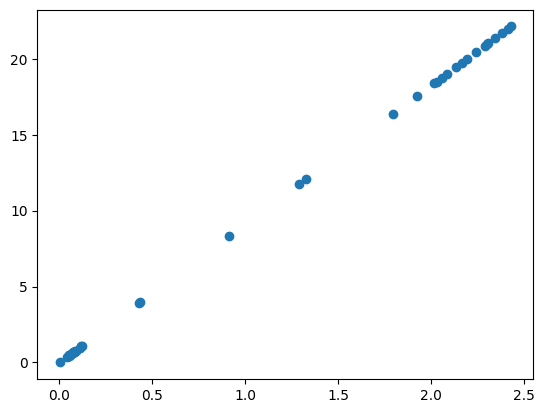

In [26]:
plt.plot(x_sample, y_sample_predict, "o")
plt.show()